In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [44]:
data_income = pd.read_csv(r'C:\Users\ruchi\Videos\Data_Science\nptel\income(1).csv')
data_income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [45]:
data = data_income.copy()

EDA

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [47]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [48]:
summary_num = data.describe()
summary_num

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [49]:
summary_cate = data.describe(include='O')
summary_cate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [50]:
data['JobType'].value_counts()

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [51]:
data['occupation'].value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
?                    1816
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [52]:
np.unique(data['occupation'].values)

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [53]:
np.unique(data['JobType'].values)

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [54]:
data = pd.read_csv(r'C:\Users\ruchi\Videos\Data_Science\nptel\income(1).csv',na_values=[" ?"])

In [55]:
data.shape

(31978, 13)

Data pre-processing

In [56]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [57]:
missing = data[data.isnull().any(axis=1)]

In [58]:
missing.shape

(1816, 13)

In [59]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


1816-1809 = 7 -> still have occupaton unfilled.becoz jobtype is  Never worked

In [60]:
data2 = data.dropna(axis=0)

In [61]:
correlation = data2.corr(numeric_only=True)
correlation # corelation values lies between -1 to +1 and 0 means no corelation and +1 means strong corelation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


Data Visualization

In [62]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

geneder propertion table

In [63]:
gender = pd.crosstab(index = data2["gender"], columns="count", normalize=True)
gender 

col_0,count
gender,
Female,0.324315
Male,0.675685


In [64]:
gender_salstat = pd.crosstab(index = data2["gender"],columns = data2["SalStat"], normalize='index',margins = True)
gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


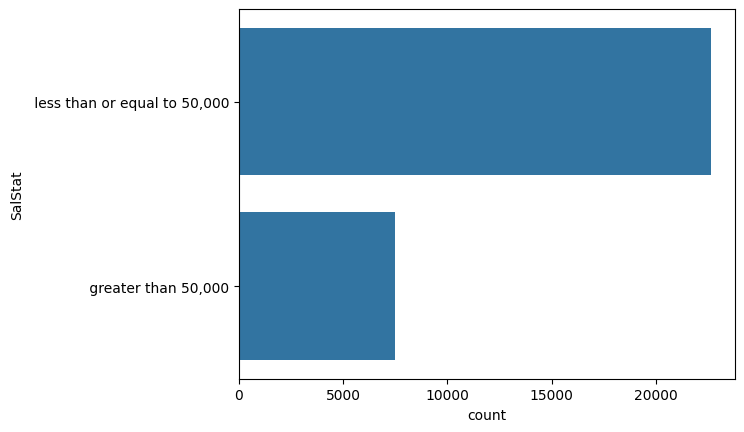

In [65]:
SalStat = sns.countplot(data2['SalStat'])

C:\Users\ruchi\AppData\Local\Temp\ipykernel_14260\1757446510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['age'],bins=10,kde=False)


<Axes: xlabel='age'>

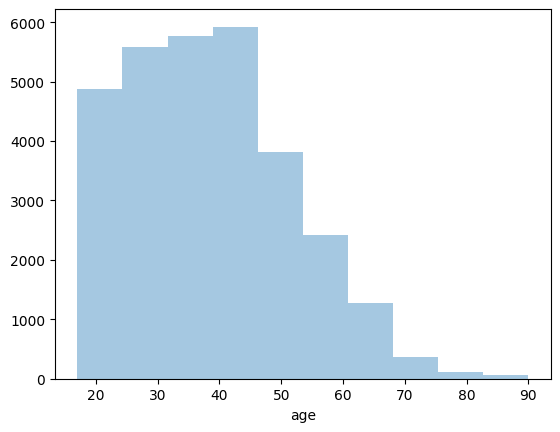

In [66]:
sns.distplot(data2['age'],bins=10,kde=False)

SalStat
greater than 50,000             43.0
less than or equal to 50,000    34.0
Name: age, dtype: float64


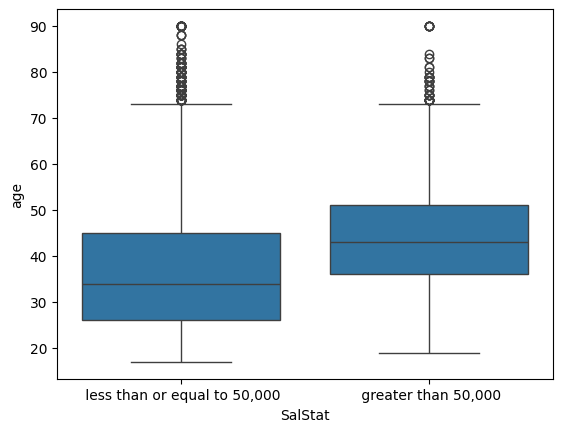

In [67]:
# Boxplot
sns.boxplot(x='SalStat', y='age', data=data2)


# Median age by salary status
print(data2.groupby('SalStat')['age'].median())

EDA

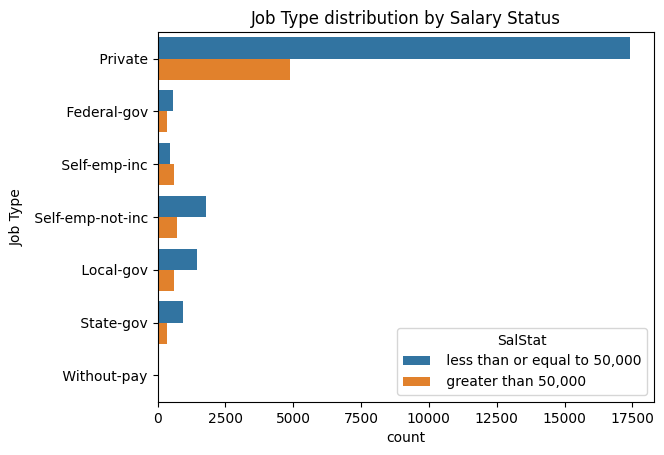

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of JobType vs Salary Status
sns.countplot(y='JobType', hue='SalStat', data=data2)

plt.xlabel("count")
plt.ylabel("Job Type")
plt.title("Job Type distribution by Salary Status")
plt.show()

In [69]:
edu_salstat = pd.crosstab(index = data2["JobType"],columns = data2["SalStat"], normalize='index',margins = True)
edu_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.248922,0.751078


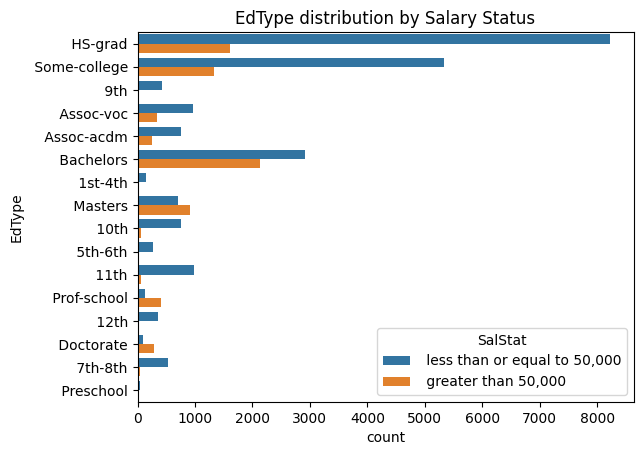

In [70]:
sns.countplot(y='EdType', hue='SalStat', data=data2)

plt.xlabel("count")
plt.ylabel("EdType")
plt.title("EdType distribution by Salary Status")
plt.show()

In [71]:
edu_salstat = pd.crosstab(index = data2["EdType"],columns = data2["SalStat"], normalize='index',margins = True)
edu_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


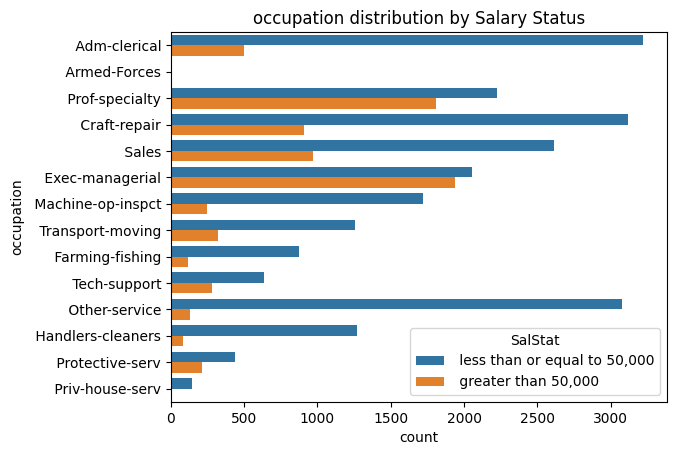

In [72]:
sns.countplot(y='occupation', hue='SalStat', data=data2)

plt.xlabel("count")
plt.ylabel("occupation")
plt.title("occupation distribution by Salary Status")
plt.show()

In [73]:
edu_salstat = pd.crosstab(index = data2["occupation"],columns = data2["SalStat"], normalize='index',margins = True)
edu_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


<Axes: xlabel='capitalgain', ylabel='Count'>

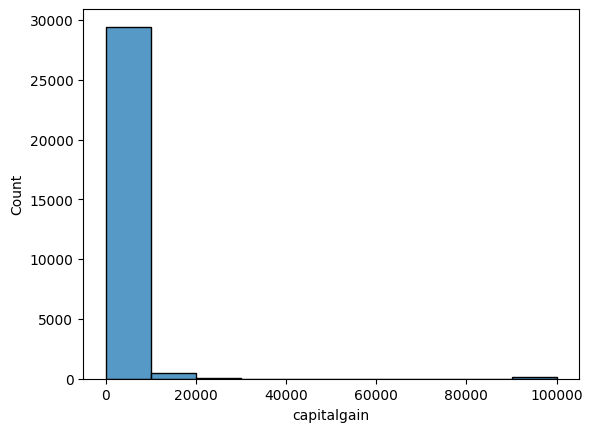

In [74]:
sns.histplot(data2['capitalgain'], bins=10, kde=False)
#92% of capitalgain values are 0 that is 27611

<Axes: xlabel='capitalloss', ylabel='Count'>

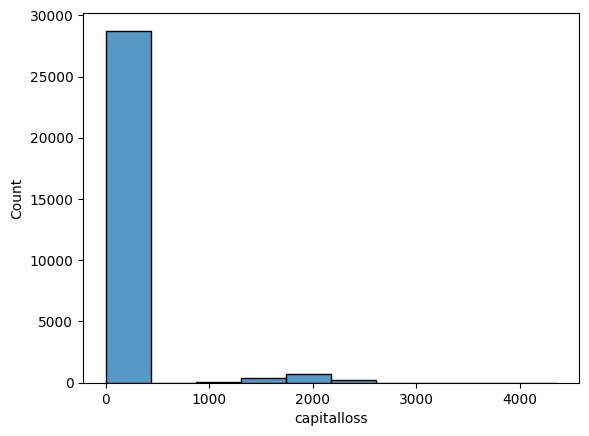

In [75]:
sns.histplot(data2['capitalloss'], bins=10, kde=False)
#95% of capitalgain values are 0 that is 28721

C:\Users\ruchi\AppData\Local\Temp\ipykernel_14260\1305401821.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SalStat', y='hoursperweek', data=data2, palette="Set2", showmeans=True)


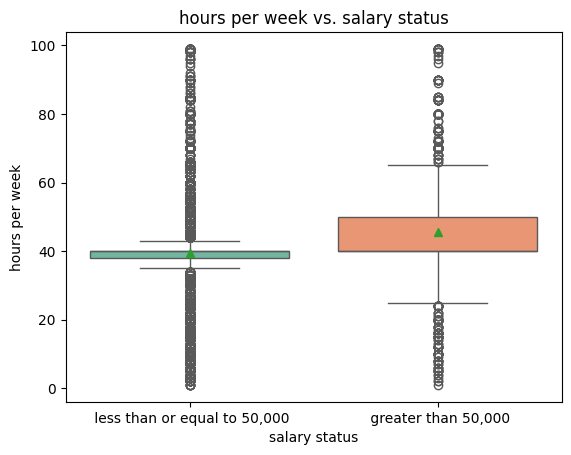

In [76]:
sns.boxplot(x='SalStat', y='hoursperweek', data=data2, palette="Set2", showmeans=True)

plt.xlabel("salary status")
plt.ylabel("hours per week")
plt.title("hours per week vs. salary status")
plt.show()

Logistic Regression Model

In [78]:
data2['SalStat'] = data2['SalStat'].map({'less than or equal to 50000':0,'greater than 50000':1})
data2['SalStat']

C:\Users\ruchi\AppData\Local\Temp\ipykernel_14260\783047944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].map({'less than or equal to 50000':0,'greater than 50000':1})


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
31973   NaN
31974   NaN
31975   NaN
31976   NaN
31977   NaN
Name: SalStat, Length: 30162, dtype: float64

In [80]:
new_data = pd.get_dummies(data2, drop_first=True)
new_data

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,NaN,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,24,0,0,40,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,44,0,0,40,NaN,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,27,0,0,40,NaN,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20,0,0,35,NaN,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,NaN,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31974,34,0,0,40,NaN,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31975,23,0,0,40,NaN,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31976,42,0,0,40,NaN,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [81]:
columns_list = list(new_data.columns)
print(columns_list)


['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [83]:
features = list(set(columns_list)-set(['SalStet']))
features

['occupation_ Exec-managerial',
 'maritalstatus_ Married-spouse-absent',
 'nativecountry_ Yugoslavia',
 'race_ Black',
 'nativecountry_ El-Salvador',
 'nativecountry_ Haiti',
 'nativecountry_ Ireland',
 'nativecountry_ Trinadad&Tobago',
 'EdType_ 5th-6th',
 'EdType_ 12th',
 'maritalstatus_ Separated',
 'occupation_ Farming-fishing',
 'nativecountry_ Jamaica',
 'capitalloss',
 'EdType_ 1st-4th',
 'race_ Asian-Pac-Islander',
 'nativecountry_ Laos',
 'SalStat',
 'JobType_ Self-emp-inc',
 'nativecountry_ Philippines',
 'relationship_ Other-relative',
 'EdType_ Bachelors',
 'JobType_ Self-emp-not-inc',
 'EdType_ Assoc-voc',
 'nativecountry_ Peru',
 'occupation_ Priv-house-serv',
 'occupation_ Protective-serv',
 'nativecountry_ England',
 'relationship_ Own-child',
 'EdType_ Masters',
 'gender_ Male',
 'nativecountry_ China',
 'EdType_ Preschool',
 'occupation_ Craft-repair',
 'nativecountry_ Holand-Netherlands',
 'relationship_ Wife',
 'EdType_ 7th-8th',
 'occupation_ Handlers-cleaners',
 '

In [85]:
y = new_data['SalStat'].values
y

array([nan, nan, nan, ..., nan, nan, nan], shape=(30162,))

In [86]:
x = new_data[features].values
x

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, True, False]],
      shape=(30162, 95), dtype=object)

In [87]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)

In [90]:
train_x, test_x, train_y, test_y

(array([[False, False, False, ..., False, False, True],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., True, False, True],
        ...,
        [False, False, False, ..., False, True, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
       shape=(21113, 95), dtype=object),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, True, False],
        [True, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, True, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
       shape=(9049, 95), dtype=object),
 array([nan, nan, nan, ..., nan, nan, nan], shape=(21113,)),
 array([nan, nan, nan, ..., nan, nan, nan], shape=(9049,)))

In [100]:
logistic = LogisticRegression()

In [102]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Create imputer (replace NaN with column mean, you can also use "median" or "most_frequent")
imputer = SimpleImputer(strategy="mean")

# Fit imputer on train_x and transform
train_x_imputed = imputer.fit_transform(train_x)

# Fit logistic regression
logistic = LogisticRegression()
logistic.fit(train_x_imputed, train_y)

# Get coefficients and intercept
print("Coefficients:", logistic.coef_)
print("Intercept:", logistic.intercept_)


ValueError: Found array with 0 sample(s) (shape=(0, 95)) while a minimum of 1 is required by SimpleImputer.

# Reindexing the salary status names to 0,1


In [105]:
data3 = data2.copy()
data3

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,NaN
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,NaN
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,NaN
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,NaN
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,NaN
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,NaN
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,NaN
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,NaN


In [106]:
data3['SalStat']=data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data3['SalStat'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
31973   NaN
31974   NaN
31975   NaN
31976   NaN
31977   NaN
Name: SalStat, Length: 30162, dtype: float64
